In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import numpy as np
import pydotplus
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from PIL import Image as PILImage

In [2]:
pip install pydotplus

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pydotplus scikit-learn ipython pillow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Load the dataset
df = pd.read_csv("NLP_Dataset1.csv")

In [5]:
df.head()

,AssetId,organizationid,organizationcountrycode,locationid,AssetType,AlarmLabel,AlarmMessage,Severity,ActivatedTimestamp,ClearedTimestamp,month,week,ResolutionTimeMinutes,Lemmas_No_Stop_Words,Tokens
0,001e6d91-324b-4b99-84f8-9435148de9ce,5effecae-fdee-494a-bf38-d4cb5d7cc405,US,Default Location,UPS,Battery Near End Of Life Cleared,The battery is no longer near the end of life.,WARNING,2021-01-17T23:32:55Z,2021-03-16T14:37:52Z,1.0,3,82984.950000,"['battery', 'near', 'end', 'life', 'clear']","['battery', 'near', 'end', 'of', 'life', 'clea..."
1,001e6d91-324b-4b99-84f8-9435148de9ce,5effecae-fdee-494a-bf38-d4cb5d7cc405,US,Default Location,UPS,Power Failure Cleared,No longer on battery power.,WARNING,2021-01-08T20:55:56Z,2021-01-08T20:56:19Z,1.0,2,0.383333,"['power', 'failure', 'clear']","['power', 'failure', 'cleared']"
2,004209ba-f692-41b8-af30-5b51996f1abb,a3768a07-4e2d-4075-ab6b-66e3541fc6c4,US,275102b5-af38-456c-982b-7a6d33850e13,UPS,Device Communication Alert,"Communication with the UPS \""redact\"" has been...",CRITICAL,2021-01-08T20:28:05Z,2021-01-08T20:36:14Z,1.0,2,8.150000,"['device', 'communication', 'alert']","['device', 'communication', 'alert']"
3,004209ba-f692-41b8-af30-5b51996f1abb,a3768a07-4e2d-4075-ab6b-66e3541fc6c4,US,275102b5-af38-456c-982b-7a6d33850e13,UPS,Device Communication Alert,"Communication with the UPS \""redact\"" has been...",CRITICAL,2021-01-29T11:51:23Z,2021-01-29T11:56:16Z,1.0,5,4.883333,"['device', 'communication', 'alert']","['device', 'communication', 'alert']"
4,004209ba-f692-41b8-af30-5b51996f1abb,a3768a07-4e2d-4075-ab6b-66e3541fc6c4,US,275102b5-af38-456c-982b-7a6d33850e13,UPS,Device Communication Alert,"Communication with the UPS \""redact\"" has been...",CRITICAL,2021-01-29T09:41:23Z,2021-01-29T09:46:22Z,1.0,5,4.983333,"['device', 'communication', 'alert']","['device', 'communication', 'alert']"


In [6]:
# Preprocessing
X = df[['AssetType', 'AlarmLabel']].copy()  # Create a copy to avoid warnings
y = df['Severity']  # Target variable

In [7]:
# Convert categorical variables to numerical using LabelEncoder
label_encoders = {}
for col in ['AssetType', 'AlarmLabel']:
    label_encoders[col] = LabelEncoder()
    X.loc[:, col] = label_encoders[col].fit_transform(X[col])

In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [10]:
# Model evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

    CRITICAL       0.96      0.91      0.94   3006128
       ERROR       0.63      0.86      0.73    689446
        FAIL       0.75      0.84      0.80    362795
        INFO       0.70      0.85      0.77    676070
     WARNING       0.99      0.87      0.93   2228326

    accuracy                           0.88   6962765
   macro avg       0.81      0.87      0.83   6962765
weighted avg       0.90      0.88      0.89   6962765

[[2735044  132007   43819   88281    6977]
 [   3048  590940    7294   86423    1741]
 [   2242   46062  306204    8116     171]
 [  13846   46580   36164  572209    7271]
 [  85853  123048   13020   62734 1943671]]


In [11]:
# Export the decision tree to a .dot file
export_graphviz(model, out_file='decision_tree.dot', 
                feature_names=X.columns, class_names=model.classes_, 
                filled=True, rounded=True)

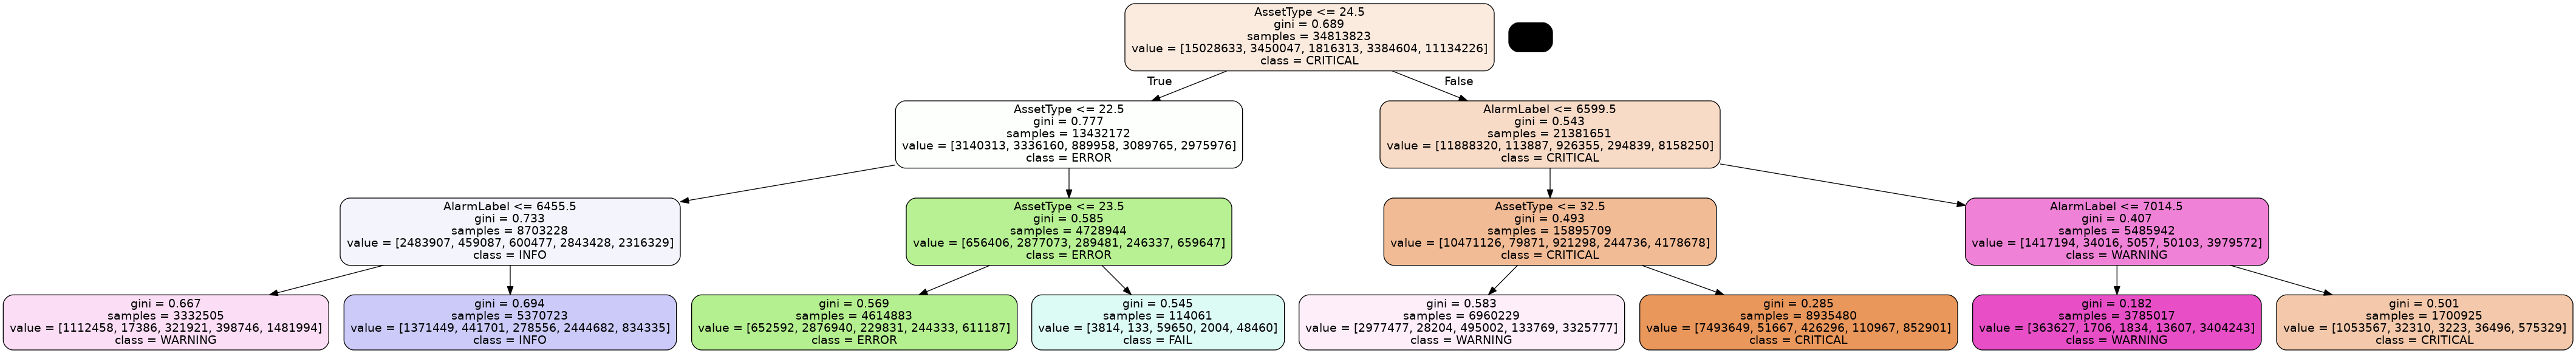

In [12]:
import pydotplus
from sklearn.tree import export_graphviz
from IPython.display import Image

# Limit tree depth to 3 for simplicity
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X, y)

# Export the decision tree to a .dot file
export_graphviz(model, out_file='decision_tree.dot', 
                feature_names=X.columns, class_names=model.classes_, 
                filled=True, rounded=True)

# Read the .dot file and create a graph from it
with open('decision_tree.dot') as f:
    dot_graph = f.read()
graph = pydotplus.graph_from_dot_data(dot_graph)

# Save the graph as a PNG image
graph.write_png('decision_tree.png')

# Display the PNG image
Image(filename='decision_tree.png')

In [13]:
# Feature importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
print("Feature importances:\n", feature_importances)

Feature importances:
 AssetType     0.630756
AlarmLabel    0.369244
dtype: float64


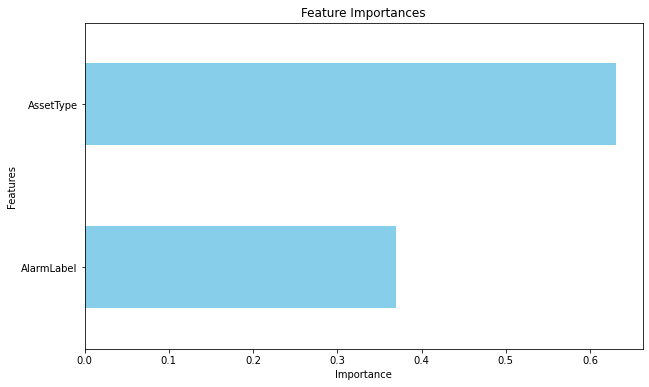

In [14]:
# Plotting the feature importances
plt.figure(figsize=(10, 6))
feature_importances.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

In [15]:
import pydotplus
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from IPython.display import Image

In [16]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

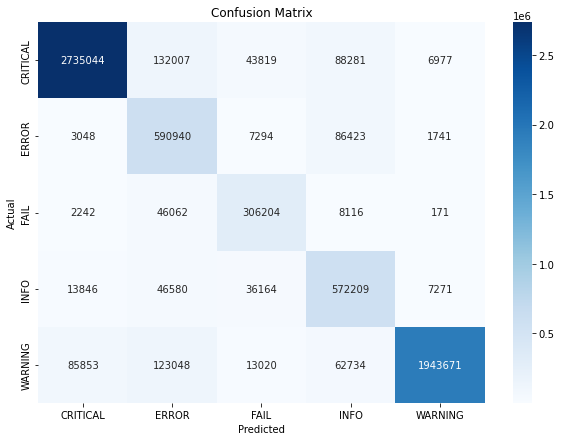

In [17]:
#Plot the confusion matrix using seaborn
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()